## Import Libraries

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC





## Read Data

In [10]:
dia = pd.read_csv('diabetes.csv')

In [11]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analyze data

In [12]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

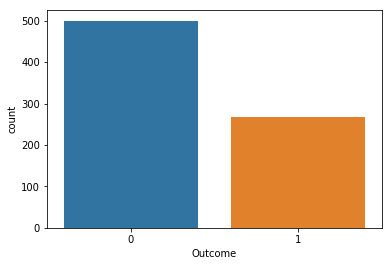

In [13]:
sns.countplot(x='Outcome',data=dia)

In [14]:
columns=dia.columns[:8]

length=len(columns)

In [19]:
import matplotlib.pyplot as plt
import itertools



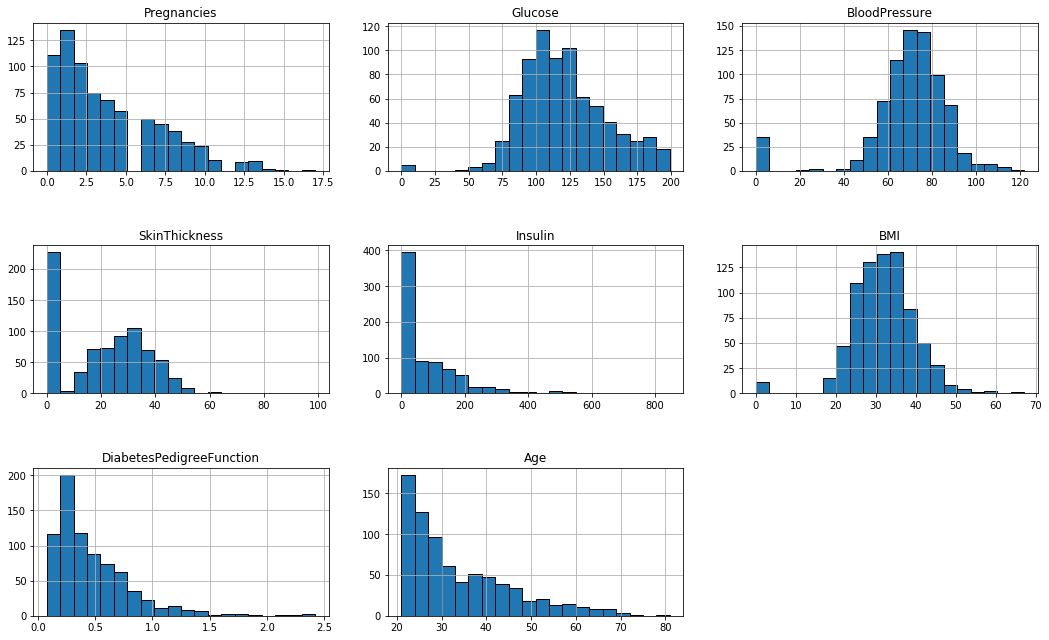

In [20]:
plt.subplots(figsize=(18,15))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dia[i].hist(bins=20,edgecolor='black')
    plt.title(i)

## Correlations

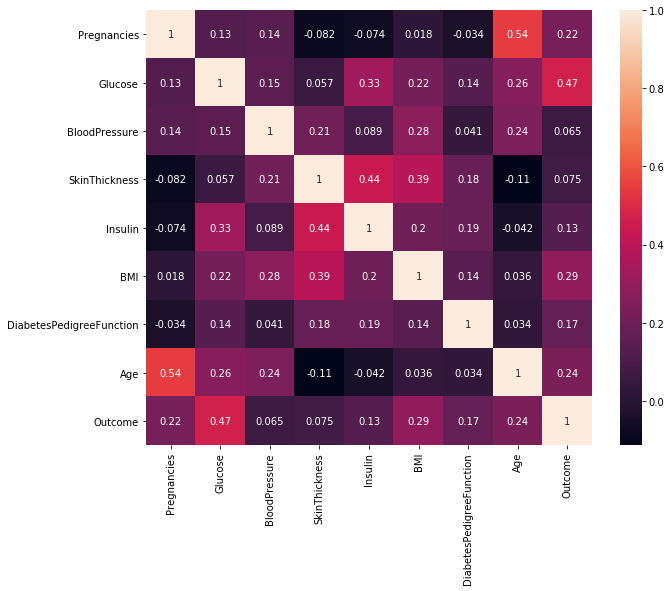

In [21]:
sns.heatmap(dia.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Split Data

In [22]:
Outcome=dia['Outcome']
variables=dia[dia.columns[:8]]
train,test=train_test_split(dia,test_size=0.25,random_state=0,stratify=dia['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

## Machine Learning Models

In [25]:
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve \
,average_precision_score, precision_recall_curve, precision_score, f1_score

In [35]:
clfs = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),\
        KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=50),\
       GaussianNB(),SVC(kernel="linear"),SVC(kernel="rbf"),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for clf in clfs:
    clf.fit(train_X,train_Y)
    y_pred=clf.predict(test_X)
    print("===================",clf)
    #print(clf.score(x_test,y_test)*100)
    print(classification_report(test_Y,y_pred))
    print(clf.score(test_X,test_Y))

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=================== LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

   micro avg       0.78      0.78      0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

0.7760416666666666
=================== KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.63      0.55      0.59        67

   micro avg       

C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mariam k\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

=================== RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       125
           1       0.71      0.61      0.66        67

   micro avg       0.78      0.78      0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192

0.7760416666666666
